<a href="https://colab.research.google.com/github/Koyac/Image100knocks1/blob/main/Image100knocks1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial Python

C++でやりたい人はこっち〜〜

https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/Tutorial/README_opencv_c_install.md

JavaScriptでやりたい人はこっち〜〜

https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/Tutorial/README_javascript.md

ここでは画像処理におけるnumpyの基本的な使い方をいくつか紹介する。

numpyとはpyhtonで用意されたパッケージ(Cでいうライブラリのようなもの)の一種で、行列演算などが得意。

また、画像処理ではOpenCVというライブラリがあり、様々な処理をAPIにしてる。https://opencv.org/

この問題では、numpyをいじって、OpenCVの処理を自分の手で実現することが目標。

pythonでのOpenCVはnumpyをベースとしているため、numpyがいじれる=OpenCVもいじれる　ことになる。

jupyter notebookがおすすめ！ もしくはGoogleColab https://colab.research.google.com/notebooks/intro.ipynb?hl=ja

## 必要ライブラリのインストール

In [ ]:
!pip install numpy matplotlib opencv-python sklearn

## ライブラリのインポート

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## 画像の読み込み、表示

ローカルにある画像はcv2.imread で読み込みができますが、これをmatplotlibで表示すると、変な色になります。

cv2で読み込むとBGRの順番になりますが、matplotlibではRGBとして扱われるからです。

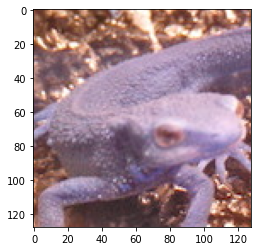

In [ ]:
# 画像の読み込み
img = cv2.imread("imori.jpg")

# 画像の表示
plt.imshow(img)
plt.show()

　なので、画像のBGRの反転が必要になります。

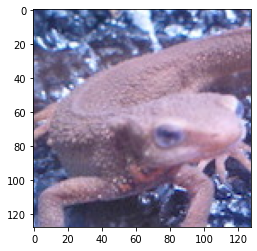

In [ ]:
img = img[...,::-1]
plt.imshow(img)
plt.show()

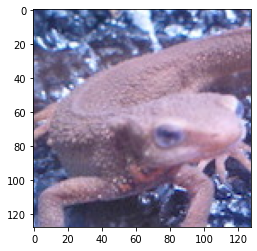

In [ ]:
img = cv2.imread("imori.jpg")
img = img[...,::-1]

plt.imshow(img)
plt.show()

つまり、opencvで読み込むならBGRをRGBに反転する癖をつけましょう

## URLの画像を読み込む

sklearnのio.imreadはURLでの指定が可能です。imori_128x128.pngやimori_256x256.pngはネット公開されているので、URL指定が可能です。
しかもこっちはRGBの順に読み込まれるので、opencvと違い反転の必要がありません。

GoogleColabなどを使用する人は、こっちの方が画像をダウンロードする手間がないので楽です!

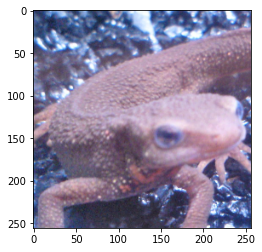

In [ ]:
from skimage import io

img = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/assets/imori_256x256.png')

plt.imshow(img)
plt.show()

## 画像データの基礎知識

- データの中身は0 ~ 255の整数256段階
- 基本カラー画像はRGBの組み合わせで表現される

画像データの中身は0から255の256 $(= 2 ^ 8)$段階で、これは8ビットに由来する。値が大きいほど色が強く現れるということになる。

In [ ]:
print('min=',img.min())
print('max=',img.max())

min= 5
max= 255


色はRGB (Red, Green, Blue)の３色を組み合わせて表現されている。この数はチャンネルと呼ばれる。それぞれ抜き出してみる。
ちなみにグレースケールと呼ばれる画像は、RGBに重みをつけて1チャンネルにしたものになるので、チャンネル数は1となる。

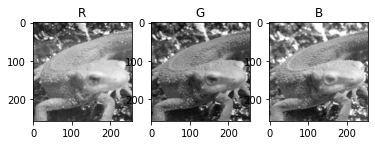

In [ ]:
r = img[...,0]
g = img[...,1]
b = img[...,2]
plt.subplot(1,3,1)
plt.title("R")
plt.imshow(r,cmap='gray')

plt.subplot(1,3,2)
plt.title("G")
plt.imshow(g,cmap='gray')

plt.subplot(1,3,3)
plt.title("B")
plt.imshow(b,cmap='gray')
plt.show()

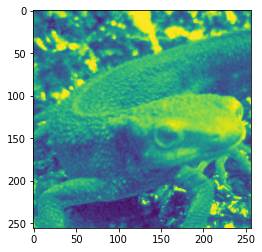

In [ ]:
plt.imshow(b)
plt.show()

## 画像のサイズ

shapeには（縦サイズ、横サイズ、チャンネルサイズ）が入っています

In [ ]:
img.shape

(256, 256, 3)

## 画像のデータ型

型をとるには、img.dtypeを使用します。 uint8とは符号なしintで8ビットを意味します。画像はRGB成分がそれぞれ通常0から255の256段階で表現されます。 例えば、赤のピクセルは(R,G,B) = (255, 0, 0)、白は(R,G,B) = (255, 255, 255)です。 画像にする時は必ずこの型にしないと画像がおかしくなってしまいます。（あとで説明します。）

例えば、imgの型をfloat32にしてみます。 これはastype()を使えばできます。

In [ ]:
img.dtype

dtype('uint8')

In [ ]:
_img = img.astype(np.float32)
_img.dtype

dtype('float32')

ただし、float型は表示されない。 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


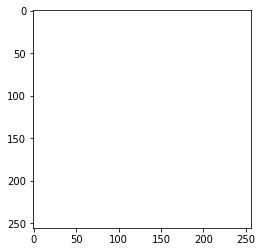

In [ ]:
plt.imshow(_img)
plt.show()

ただし、float型の時は、$[0, 1]$の範囲の値になっていれば表示できる。なので、255で割ってみると表示できる

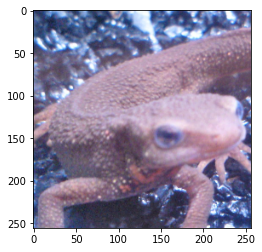

In [ ]:
_img /= 255
plt.imshow(_img)
plt.show()

一般的に画像を操作する時は、以下の方法がおすすめ

1. cv2.imread, io.imreadで読み込む
2. 型を一度np.float32など小数点型に変換する
3. 画像をいじる
4. 画素が0未満のものは0, 255を超えたものは255に直す。（超重要）
5. 型をnp.uint8に変換して表示・保存する この手順にすることをおすすめします。

## 画像のコピー

画像を別変数にコピーしたい時はcopy()を使いましょう。単純に img2 = img とすると、画像のアドレスが保存されるのでimg2をいじるとimgにも反映されてしまします。特別な利用がない場合は、copy()で画像をコピーしましょう。

In [ ]:
img2 = img.copy()

## 画素をいじる

画像の操作法はnumpyとほとんど同じ。

例えば、x=30、y=20の画素値をいじりたい時は、こうする。 画素値はBGRの順に並んでいます。array()とはnumpy形式になっていることを意味する。つまり、opencv, sklearnはnumpyをラッパーしている。

In [ ]:
img[20,30]

array([ 58,  75, 121], dtype=uint8)

さらに、x=30、y=20、のG成分をとる時はこうします。

In [ ]:
img[20,30,1]

75

ここから、numpyの本題になる。

numpyにはスライスという機能がある。 これはある値v1からある値v2までの全ての要素にアクセスできることを意味する。

例えば、y=20, x=[30, 32]までを見る時はこうする。 30:33とすれば行列のまま取り出せる。a:bとすることで、a<= v < bの値にアクセスできる。 ちなみに :30とすれば [0, 30]、30:とすれば[30, 最後]までを取り出せる。

In [ ]:
img[20, 30:33]

array([[ 58,  75, 121],
       [ 43,  70, 113],
       [ 47,  72, 103]], dtype=uint8)

例えば画像の左上(x=[0, 50], y = [0, 50])を黒にするには、こんな感じでできる。 

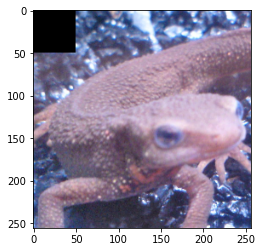

In [ ]:
img2 = img.copy()
img2[:50, :50] = 0
plt.imshow(img2)
plt.show()

次に先程の　4. 画素が0未満のものは0, 255を超えたものは255に直す。　に関して説明します。

例えば、画像を一度 float32型にして、一部分のB成分を260という値に変えてみます。 uint8型は[0, 255] の範囲しか取り得ないので、これをuint8型に直すとこんな風になります。 イモリの顔の一部分が黄色くなってしまっています。

これは、260をuint8型に直すと260 - 256 が起きて、B=4となってしまうためです。 これが原因で画素値がおかしくなることが多々起きてしまいます。 なので、4の操作が必要となります。

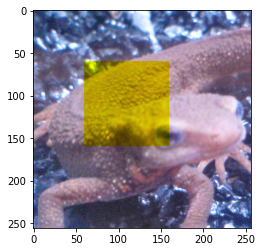

In [ ]:
img2 = img.copy().astype(np.float32)
img2[60:160, 60:160, 2] = 260
img2 = img2.astype(np.uint8)
plt.imshow(img2)
plt.show()

In [ ]:
img2[60, 60, 2]

4

## 画像の保存

画像の保存にはcv2.imwrite()または、plt.savefig()などを使いましょう

In [ ]:
cv2.imwrite('sample.png', img2)

True

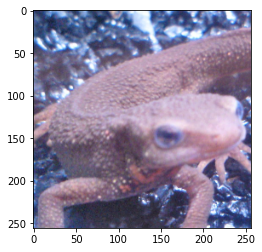

In [ ]:
plt.imshow(img)
plt.savefig('sample.png')

## 練習

画像の左半分上のRとBを入れ替えて表示してみましょう。

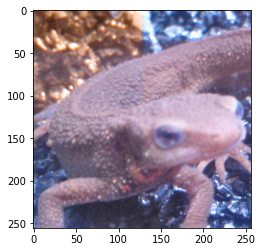

In [ ]:
img3 = img.copy()
h, w, c = img3.shape
img3[: h // 2, : w // 2] = img3[: h // 2, : w // 2, ::-1]
plt.imshow(img3)
plt.show()

以上でチュートリアルは終了です。あとはばんばん問題を解いて下さい！！！！

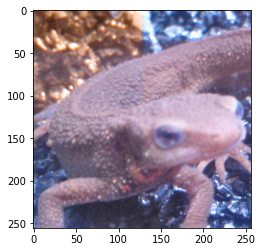

In [ ]:
img3 = img.copy()
h,w,c = img3.shape
img3[:h//2,:w//2] = img3[:h//2,:w//2,::-1]
plt.imshow(img3)
plt.show()

In [38]:
import cv2
img = cv2.imread("imori.jpg")

In [39]:
from google.colab.patches import cv2_imshow

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


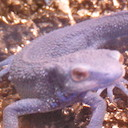

In [ ]:
#1-1
import cv2

def BGR2RGB(img):
  b = img[:, :, 0].copy()
  g = img[:, :, 1].copy()
  r  = img[:, :, 2].copy()

  #RGB > BGR
  img[:, :, 0] = r
  img[:, :, 1] = g
  img[:, :, 2] = b

  return img

img = cv2.imread("imori.jpg")

img = BGR2RGB(img)

cv2.imwrite("out.jpg", img)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

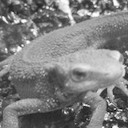

In [ ]:
#1-2

import cv2
import numpy as np

def BGR2GRAY(img):
  b = img[:, :, 0].copy()
  g = img[:, :, 1].copy()
  r = img[:, :, 2].copy()

  out = 0.2126 * r + 0.7152 * g + 0.0722 * b
  out = out.astype(np.uint8)

  return out

img = cv2.imread("imori.jpg").astype(np.float32)
out = BGR2GRAY(img)

cv2.imwrite("out.jpg",out)
cv2_imshow(out)
cv2.waitKey(0)
cv2.destroyAllWindows()

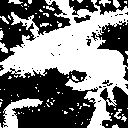

In [ ]:
#1-3

import cv2
import numpy as np

def BGR2GRAY(img):
	b = img[:, :, 0].copy()
	g = img[:, :, 1].copy()
	r = img[:, :, 2].copy()


	out = 0.2126 * r + 0.7152 * g + 0.0722 * b
	out = out.astype(np.uint8)

	return out


def binarization(img, th=128):
	img[img < th] = 0
	img[img >= th] = 255
	return img
	

img = cv2.imread("imori.jpg").astype(np.float32)

out = BGR2GRAY(img)

out = binarization(out)

cv2.imwrite("out.jpg", out)
cv2_imshow(out)
cv2.waitKey(0)
cv2.destroyAllWindows()

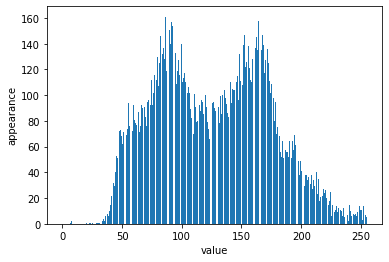

In [ ]:
#1-4

import cv2
import matplotlib.pyplot as plt
img = cv2.imread("imori.jpg")
gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
plt.hist(gray.ravel(), bins=255, rwidth=0.8, range=(0,255))
plt.xlabel('value')
plt.ylabel('appearance')
plt.show()

threshold >> 127


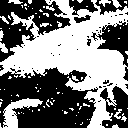

In [ ]:
#1-4 これは難しい
import cv2
import numpy as np


# Gray scale
def BGR2GRAY(img):
	b = img[:, :, 0].copy()
	g = img[:, :, 1].copy()
	r = img[:, :, 2].copy()

	# Gray scale
	out = 0.2126 * r + 0.7152 * g + 0.0722 * b
	out = out.astype(np.uint8)

	return out

# Otsu Binalization
def otsu_binarization(img):
	max_sigma = 0
	max_t = 0
	H, W = img.shape
	# determine threshold
	for _t in range(1, 256):
		v0 = out[np.where(out < _t)]
		m0 = np.mean(v0) if len(v0) > 0 else 0.
		w0 = len(v0) / (H * W)
		v1 = out[np.where(out >= _t)]
		m1 = np.mean(v1) if len(v1) > 0 else 0.
		w1 = len(v1) / (H * W)
		sigma = w0 * w1 * ((m0 - m1) ** 2)
		if sigma > max_sigma:
			max_sigma = sigma
			max_t = _t

	# Binarization
	print("threshold >>", max_t)
	th = max_t
	out[out < th] = 0
	out[out >= th] = 255

	return out


# Read image
img = cv2.imread("imori.jpg").astype(np.float32)


# Grayscale
out = BGR2GRAY(img)

# Otsu's binarization
out = otsu_binarization(out)

# Save result
cv2.imwrite("out.jpg", out)
cv2_imshow(out)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#1-5 再度学習

import cv2
import numpy as np


# BGR -> HSV
def BGR2HSV(_img):
	img = _img.copy() / 255.

	hsv = np.zeros_like(img, dtype=np.float32)

	# get max and min
	max_v = np.max(img, axis=2).copy()
	min_v = np.min(img, axis=2).copy()
	min_arg = np.argmin(img, axis=2)

	# H
	hsv[..., 0][np.where(max_v == min_v)]= 0
	## if min == B
	ind = np.where(min_arg == 0)
	hsv[..., 0][ind] = 60 * (img[..., 1][ind] - img[..., 2][ind]) / (max_v[ind] - min_v[ind]) + 60
	## if min == R
	ind = np.where(min_arg == 2)
	hsv[..., 0][ind] = 60 * (img[..., 0][ind] - img[..., 1][ind]) / (max_v[ind] - min_v[ind]) + 180
	## if min == G
	ind = np.where(min_arg == 1)
	hsv[..., 0][ind] = 60 * (img[..., 2][ind] - img[..., 0][ind]) / (max_v[ind] - min_v[ind]) + 300
		
	# S
	hsv[..., 1] = max_v.copy() - min_v.copy()

	# V
	hsv[..., 2] = max_v.copy()
	
	return hsv


def HSV2BGR(_img, hsv):
	img = _img.copy() / 255.

	# get max and min
	max_v = np.max(img, axis=2).copy()
	min_v = np.min(img, axis=2).copy()

	out = np.zeros_like(img)

	H = hsv[..., 0]
	S = hsv[..., 1]
	V = hsv[..., 2]

	C = S
	H_ = H / 60.
	X = C * (1 - np.abs( H_ % 2 - 1))
	Z = np.zeros_like(H)

	vals = [[Z,X,C], [Z,C,X], [X,C,Z], [C,X,Z], [C,Z,X], [X,Z,C]]

	for i in range(6):
		ind = np.where((i <= H_) & (H_ < (i+1)))
		out[..., 0][ind] = (V - C)[ind] + vals[i][0][ind]
		out[..., 1][ind] = (V - C)[ind] + vals[i][1][ind]
		out[..., 2][ind] = (V - C)[ind] + vals[i][2][ind]

	out[np.where(max_v == min_v)] = 0
	out = np.clip(out, 0, 1)
	out = (out * 255).astype(np.uint8)

	return out


# Read image
img = cv2.imread("imori.jpg").astype(np.float32)

# RGB > HSV
hsv = BGR2HSV(img)

# Transpose Hue
hsv[..., 0] = (hsv[..., 0] + 180) % 360

# HSV > RGB
out = HSV2BGR(img, hsv)

# Save result
cv2.imwrite("out.jpg", out)
cv2_imshow(out)
cv2.waitKey(0)
cv2.destroyAllWindows()

AttributeError: ignored

In [ ]:
a = np.arange(9).reshape((3, 3))
print(a)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [ ]:
a = [[1,2],[2,3],[4,5]]
a[0]

[1, 2]

In [ ]:
img_ = img.copy() / 255.
min_ar = np.argmin(img_,axis=2)
min_ar

array([[2, 2, 2, ..., 1, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]])

In [ ]:
img = cv2.imread("imori.jpg").astype(np.float32)

In [ ]:
ind = np.where(min_ar==0)
ind

(array([ 0, 14, 14, 47, 71, 71, 71]), array([47, 94, 95, 19,  3,  4,  5]))

In [ ]:
ind1 = np.where(min_ar==1)
ind1

(array([  0,   0,   0, ..., 127, 127, 127]),
 array([ 44,  45,  46, ..., 100, 101, 111]))

In [ ]:
ind2 = np.where(min_ar==2)
ind2

(array([  0,   0,   0, ..., 127, 127, 127]),
 array([  0,   1,   2, ..., 125, 126, 127]))

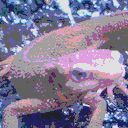

In [30]:
#1-6
import cv2
import numpy as np


# Decrease color
def decrease_color(img):
  out = img.copy()
  out = (out // 64) * 64 + 32
  return out


# Read image
img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg")

# Dicrease color
out = decrease_color(img)

cv2.imwrite("out.jpg", out)
cv2_imshow(out)
cv2.waitKey(0)
cv2.destroyAllWindows()

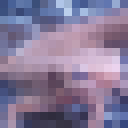

In [32]:
#1-6

def average_pooling(img,G=8):
  out = img.copy()

  H,W,C = img.shape
  Nh = int(H/G)
  Nw = int(W/G)

  for y in range(Nh):
    for x in range(Nw):
      for c in range(C):
        out[G*y:G*(y+1),G*x:G*(x+1),c] = np.mean(out[G*y:G*(y+1),G*x:G*(x+1),c]).astype(np.int)
  
  return out

img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg")
out = average_pooling(img)

cv2.imwrite("out.jpg",out)
cv2_imshow(out)
cv2.waitKey(0)
cv2.destroyAllWindows()

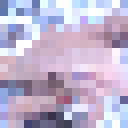

In [36]:
import numpy as np
import cv2

def max_pooling(img,G=8):
  out = img.copy()
  H,W,C = img.shape
  Nh = int(H/G)
  Nw = int(W/G)

  for y in range(Nh):
    for x in range(Nw):
      for c in range(C):
        out[G*y:G*(y+1),G*x:G*(x+1),c] = np.max(out[G*y:G*(y+1),G*x:G*(x+1),c]).astype(np.int)

  return out
img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg")
out = max_pooling(img)

cv2.imwrite("out.jpg",out)
cv2_imshow(out)
cv2.waitKey(0)
cv2.destroyAllWindows()

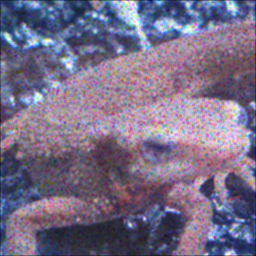

In [54]:
#1-9　ここめっちゃ難しい
import cv2
import numpy as np
# Gaussian filter
def gaussian_filter(img, K_size=3, sigma=1.3):
	if len(img.shape) == 3:
		H, W, C = img.shape
	else:
		img = np.expand_dims(img, axis=-1)
		H, W, C = img.shape
		
	## Zero padding
	pad = K_size // 2
	out = np.zeros((H + pad * 2, W + pad * 2, C), dtype=np.float)
	out[pad: pad + H, pad: pad + W] = img.copy().astype(np.float)

	## prepare Kernel
	K = np.zeros((K_size, K_size), dtype=np.float)
	for x in range(-pad, -pad + K_size):
		for y in range(-pad, -pad + K_size):
			K[y + pad, x + pad] = np.exp( -(x ** 2 + y ** 2) / (2 * (sigma ** 2)))
	K /= (2 * np.pi * sigma * sigma)
	K /= K.sum()

	tmp = out.copy()

	# filtering
	for y in range(H):
		for x in range(W):
			for c in range(C):
				out[pad + y, pad + x, c] = np.sum(K * tmp[y: y + K_size, x: x + K_size, c])

	out = np.clip(out, 0, 255)
	out = out[pad: pad + H, pad: pad + W].astype(np.uint8)

	return out

# Read image
img = cv2.imread("/content/drive/MyDrive/assets/imori_256x256_noise.png")

# Gaussian Filter
out = gaussian_filter(img, K_size=3, sigma=1.3)

# Save result
cv2.imwrite("out.jpg", out)
cv2_imshow(out)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')
img = cv2.imread("imori.jpg")

Mounted at /content/drive


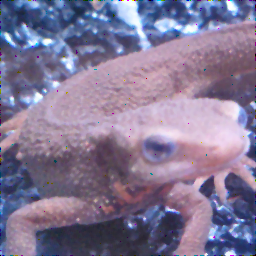

In [4]:
#1-10

import cv2
import numpy as np


# Median filter
def median_filter(img, K_size=3):
    H, W, C = img.shape

    ## Zero padding
    pad = K_size // 2
    out = np.zeros((H + pad*2, W + pad*2, C), dtype=np.float)
    out[pad:pad+H, pad:pad+W] = img.copy().astype(np.float)

    tmp = out.copy()

    # filtering
    for y in range(H):
        for x in range(W):
            for c in range(C):
                out[pad+y, pad+x, c] = np.median(tmp[y:y+K_size, x:x+K_size, c])

    out = out[pad:pad+H, pad:pad+W].astype(np.uint8)

    return out


# Read image
img = cv2.imread("/content/drive/MyDrive/assets/imori_256x256_noise.png")


# Median Filter
out = median_filter(img, K_size=3)


# Save result
cv2.imwrite("out.jpg", out)
cv2_imshow(out)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')
img = cv2.imread("imori.jpg")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


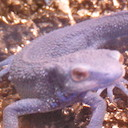

In [6]:
#1-1
import cv2

def BGR2RGB(img):
  b = img[:, :, 0].copy()
  g = img[:, :, 1].copy()
  r = img[:, :, 2].copy()

  img[:, :, 0] = r
  img[:, :, 1] = g
  img[:, :, 2] = b

  return img

img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg")
img = BGR2RGB(img)

cv2.imwrite("out.jpg",img)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

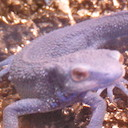

In [29]:
cv2.imwrite("out.jpg",img)
cv2_imshow(img)

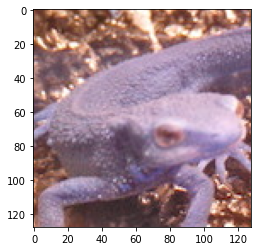

In [32]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


# 画像の読み込み
img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg")

# 画像の表示
plt.imshow(img)
plt.show()

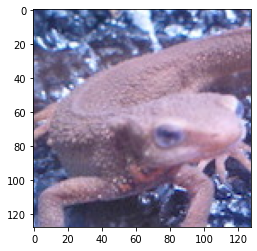

In [35]:
#BGRがRGBになる

img = img[...,]
plt.imshow(img)
plt.show()

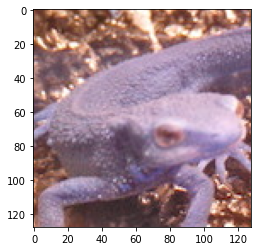

In [36]:
img = img[...,::-1]
plt.imshow(img)
plt.show()

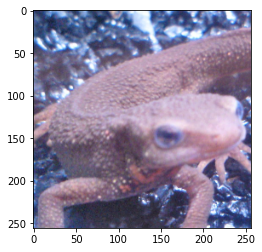

In [37]:
from skimage import io
img = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/assets/imori_256x256.png')
plt.imshow(img)
plt.show()

In [39]:
print("min=",img.min())
print("max=",img.max())

min= 5
max= 255


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')
img = cv2.imread("imori.jpg")

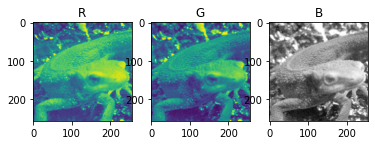

In [49]:
r = img[..., 0]
g = img[..., 1]
b = img[..., 2]
plt.subplot(1, 3, 1)
plt.title('R')
plt.imshow(r)
plt.subplot(1, 3, 2)
plt.title('G')
plt.imshow(g)
plt.subplot(1, 3, 3)
plt.title('B')
plt.imshow(b,cmap='gray')
plt.show()

In [47]:
img.shape

(256, 256, 3)

In [59]:
img.dtype

dtype('uint8')

In [64]:
_img = img.astype(np.float32)
_img.dtype

dtype('float32')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


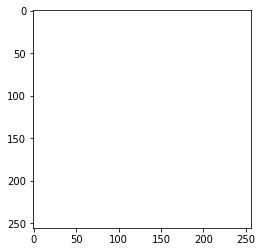

In [65]:
plt.imshow(_img)
plt.show()

In [66]:
np.max(_img)

255.0

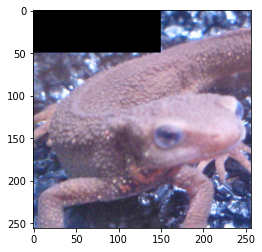

In [69]:
img2 = img.copy()
img2[:50,:150] = 0
plt.imshow(img2)
plt.show()

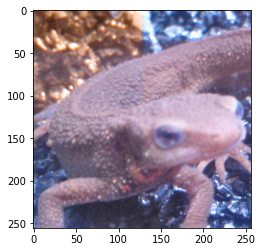

In [71]:
img3 = img.copy()
h,w,c = img3.shape
img3[:h//2,:w//2] = img3[:h//2,:w//2,::-1]
plt.imshow(img3)
plt.show()

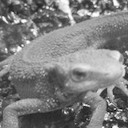

In [76]:
import cv2
import numpy as np

def BGR2GRAY(img):
  b = img[:,:,0].copy()
  g = img[:,:,1].copy()
  r = img[:,:,2].copy()

  out = 0.2126 * r + 0.7152 * g + 0.0722 * b
  out = out.astype(np.uint8)

  return out


img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg").astype(np.float)

out = BGR2GRAY(img)

cv2.imwrite("out.jpg",out)
cv2_imshow(out)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [82]:
img.shape

(128, 128, 3)

In [84]:
img[img>=0].shape

(49152,)

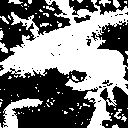

In [88]:
import cv2
import numpy as np

def BGR2GRAY(img):
  b = img[:,:, 0].copy()
  g = img[:,:, 1].copy()
  r = img[:,:, 2].copy()

  out = 0.2126*r + 0.7152*g + 0.0722*b
  return out


def binarization(img,th=128):
  img[img<th] = 0
  img[img>=th] = 255

  return img


img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg").astype(np.float)

out = BGR2GRAY(img)
out = binarization(out)

cv2.imwrite("out.jpg",out)
cv2_imshow(out)
cv2.waitKey(0)
cv2.destroyAllWindows()

threshold>> 127


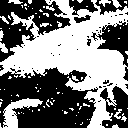

In [96]:
import cv2
import numpy as np

def BGR2GRAY(img):
  b = img[:, :, 0].copy()
  g = img[:, :, 1].copy()
  r = img[:, :, 2].copy()

  out = 0.2126*r + 0.7152*g + 0.0722*b
  out = out.astype(np.uint8)

  return out

def otsu_binarization(img):
  max_sigma = 0
  max_t = 0
  H,W = img.shape
  for _t in range(1,256):
    v0 = out[np.where(out<_t)]
    m0 = np.mean(v0) if len(v0) > 0 else 0.
    w0 = len(v0) / (H*W)
    v1 = out[np.where(out >= _t)]
    m1 = np.mean(v1) if len(v1) >0 else 0.
    w1 = len(v1) / (H*W)
    sigma = w0*w1*((m0-m1)**2)
    if sigma > max_sigma:
      max_sigma = sigma
      max_t = _t

  print("threshold>>",max_t)
  th = max_t
  out[out<th] = 0
  out[out>=th] = 255

  return out

img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg").astype(np.float32)

out = BGR2GRAY (img)

out = otsu_binarization(out)

cv2.imwrite("out.jpg",out)
cv2_imshow(out)
cv2.waitKey(0)
cv2.destroyAllWindows()

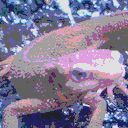

In [100]:
import cv2
import numpy as np

def decrease_color(img):
  out = img.copy()
  out = out//64*64+32
  return out

img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg")
out = decrease_color(img)

cv2.imwrite("out.jpg",out)
cv2_imshow(out)
cv2.waitKey(0)
cv2.destroyAllWindows()

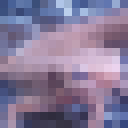

In [106]:
import cv2
import numpy as np


# average pooling
def average_pooling(img, G=8):
    out = img.copy()

    H, W, C = img.shape
    Nh = int(H / G)
    Nw = int(W / G)

    for y in range(Nh):
        for x in range(Nw):
            for c in range(C):
                out[G*y:G*(y+1), G*x:G*(x+1), c] = np.mean(out[G*y:G*(y+1), G*x:G*(x+1), c]).astype(np.int)
    
    return out


# Read image
img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg")

# Average Pooling
out = average_pooling(img)

# Save result
cv2.imwrite("out.jpg", out)
cv2_imshow(out)
cv2.waitKey(0)
cv2.destroyAllWindows()